Bayes classification method can be applied for predicting a class based on probability
assessments.


Your task is to apply it for prediction of eventual divorce of a family.


You can train your model by use of the dataset Divorce Predictors hosted in the dataset
repository at https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#.
Remember to explore and clean the data before using it for building a model.


Apply various preprocessing techniques you are familiar with for improving the accuracy of
the model, including dimensionality reduction and PCA, if appropriate.


Visualize the data and the process, as much as possible.


Apply another classification method of your choice and compare the results of it with Bayes
results.

In [36]:
# pandas to load data
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

## Load dataset


In [2]:
# loading dataset from xlsx file

dataset = pd.read_excel('./divorce.xlsx')

## Get to know the data




Investigate the dataset.
Find out how many records are available, all they all clean, how many classes they represent.
Create diagrams to visualize the set and its descriptive statistics.


In [3]:
# See shape and size
dataset.shape

(170, 55)

Attribute Information:

1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence. 

    **Target Variable –> Class**

    0 = Married
    1 = Divorced


In [4]:
# See how it looks

dataset.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,...,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,...,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,...,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,...,2,0,2,2,2,2,4,3,3,1


In [5]:
dataset.tail()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0
169,0,0,0,0,0,0,0,1,0,0,...,3,4,4,0,1,3,3,3,1,0


In [6]:
dataset.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [7]:
# See how many classes are included and how the records per class are distributed
# Group by class attribute

dataset.groupby('Class').size()

Class
0    86
1    84
dtype: int64

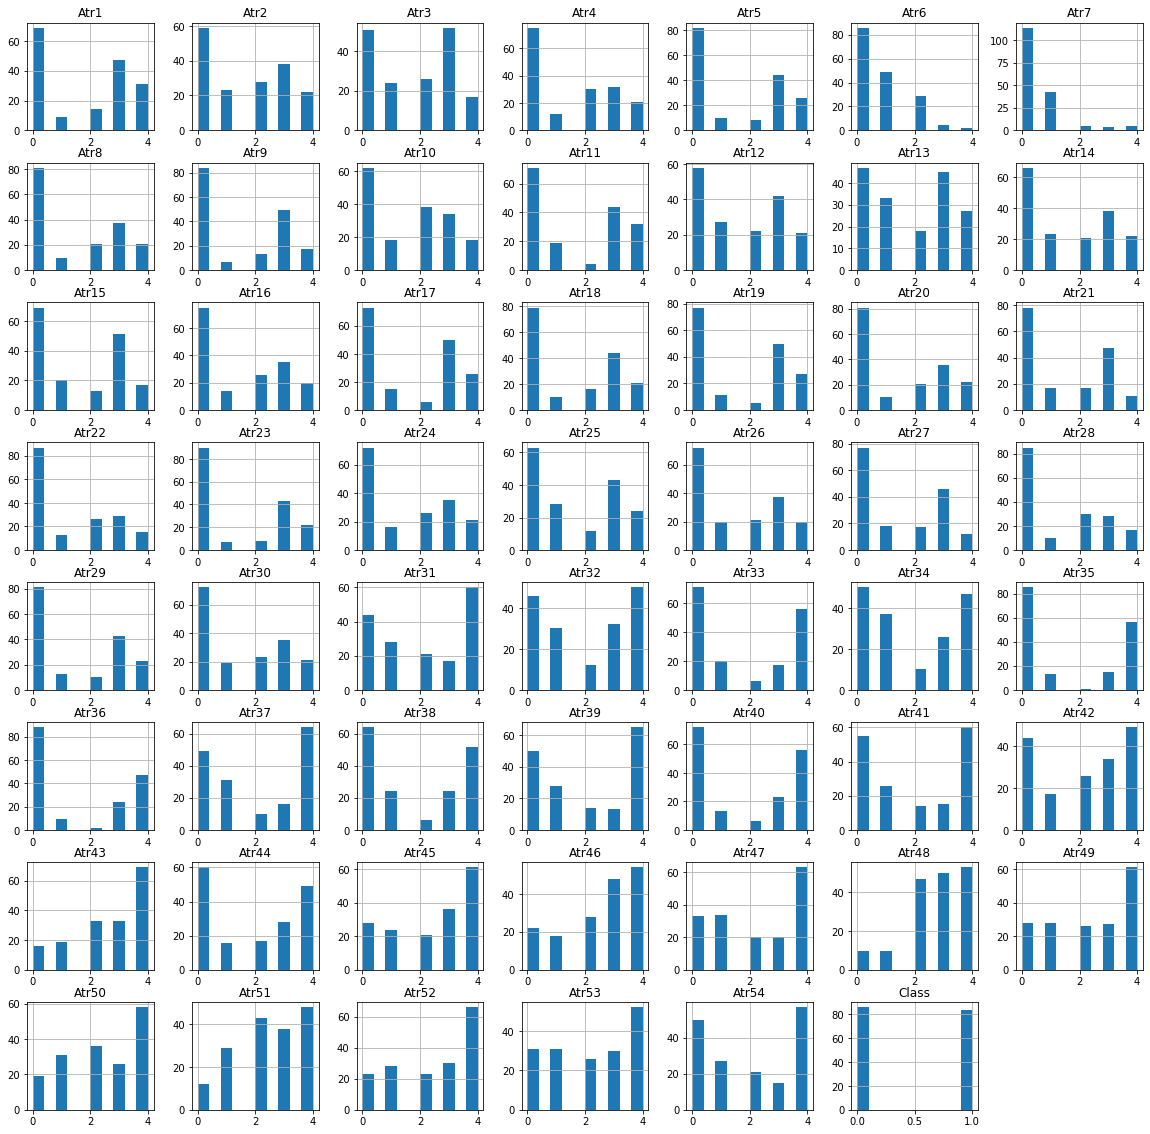

In [8]:
# Drawing histograms
dataset.hist(figsize=(20,20))
plt.show()

These diagrams show the distribution of the values in the columns.\
Two of them seem to have Normal (Gaussian) distribution.\
It is good to know, as we can later choose appropriate algorithms for exploitation.

## Cleaning data

In [9]:
# Checking for null values.

dataset.isnull().mean()

Atr1     0.0
Atr2     0.0
Atr3     0.0
Atr4     0.0
Atr5     0.0
Atr6     0.0
Atr7     0.0
Atr8     0.0
Atr9     0.0
Atr10    0.0
Atr11    0.0
Atr12    0.0
Atr13    0.0
Atr14    0.0
Atr15    0.0
Atr16    0.0
Atr17    0.0
Atr18    0.0
Atr19    0.0
Atr20    0.0
Atr21    0.0
Atr22    0.0
Atr23    0.0
Atr24    0.0
Atr25    0.0
Atr26    0.0
Atr27    0.0
Atr28    0.0
Atr29    0.0
Atr30    0.0
Atr31    0.0
Atr32    0.0
Atr33    0.0
Atr34    0.0
Atr35    0.0
Atr36    0.0
Atr37    0.0
Atr38    0.0
Atr39    0.0
Atr40    0.0
Atr41    0.0
Atr42    0.0
Atr43    0.0
Atr44    0.0
Atr45    0.0
Atr46    0.0
Atr47    0.0
Atr48    0.0
Atr49    0.0
Atr50    0.0
Atr51    0.0
Atr52    0.0
Atr53    0.0
Atr54    0.0
Class    0.0
dtype: float64

In [10]:
# Replace 0-1 with Divorced/Married
dataset['Class'] = dataset['Class'].replace(to_replace=1, value='Divorced', regex=True)
dataset['Class'] = dataset['Class'].replace(to_replace=0, value='Married', regex=True)

In [11]:
# Renaming Class to Status
dataset = dataset.rename(columns={'Class': 'Status'})

In [12]:
#Rename Atr# with Q# for question
dataset.columns = dataset.columns.str.replace("Atr", "Q")

In [13]:
dataset.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Status
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,Divorced
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,Divorced
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,Divorced
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,Divorced
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,Divorced


In [14]:
dataset.tail()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Status
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,Married
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,Married
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,Married
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,Married
169,0,0,0,0,0,0,0,1,0,0,...,3,4,4,0,1,3,3,3,1,Married


## Training 


    1. Divide the dataset into X and y
    2. Divide both into two subsets: training set and test set
    3. Implement models for training with the training sub-set
    4. Estimate how accurate is the model with the test sub-set


### Split the dataset

In [15]:
# Convert the dataset into two arrays.
array = dataset.values

#Create two sub arrays from it
X = array[:, 0:54] # data without marrige status
y = array[:, 54] # marrige status

In [17]:
# Split dataset into two:
# 80% of it as a training data
# 20% as a valitadion dataset
#Let python split the set into four, we tell the proportions of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=test_set_size, random_state=seed)

Now we have training x_train and y_train and validation data X_test, y_test\
We are ready to apply algorithms for training a model from our data.

## Gaussian Naive Bayers

In [23]:
gnbModel = GaussianNB()
gnbModel.fit(X_train, y_train)

GaussianNB()

In [24]:
# Calculate accuracy of the model over the validation set
gnbModel.score(X_test, y_test)

0.9705882352941176

In [25]:
gnbModel.score(X_train, y_train)

0.9779411764705882

In [28]:
# Test on the predicted data, try prediction

gnbPrediction = gnbModel.predict(X_test)
gnbPrediction

array(['Divorced', 'Married', 'Divorced', 'Married', 'Divorced',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Divorced', 'Married', 'Married', 'Married', 'Divorced',
       'Divorced', 'Divorced', 'Married', 'Divorced', 'Divorced',
       'Married', 'Married', 'Divorced', 'Divorced', 'Married', 'Married',
       'Married', 'Divorced', 'Married', 'Married', 'Divorced', 'Married',
       'Divorced'], dtype='<U8')

In [29]:
gnbPrediction.shape

(34,)

## Evaluation

We need a metrics for the model evaluation.\
The ‘accuracy‘ is the percentage [%] of correctly predicted instances from the total number of instances in the dataset.

In [32]:
# Confusion matrix provides an indication of the errors of prediction
print(confusion_matrix(y_test, gnbPrediction))

[[13  0]
 [ 1 20]]


In [33]:
# Classification report provides a breakdown of each class by precision, recall, f1-score and support
print(classification_report(y_test, gnbPrediction))

              precision    recall  f1-score   support

    Divorced       0.93      1.00      0.96        13
     Married       1.00      0.95      0.98        21

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



***

## Multinomial NB

In [37]:
multinomail_model = MultinomialNB()

In [38]:
multinomail_model.fit(X_train, y_train)

MultinomialNB()

In [39]:
# Check the accuracy of the fit on the model
train_accuracy = multinomail_model.score(X_train, y_train)
train_accuracy

0.9926470588235294

In [41]:
# Check the accuracy of the test 
test_accuracy = multinomail_model.score(X_test, y_test)
test_accuracy

0.9705882352941176

In [42]:
mnbPrediction = multinomail_model.predict(X_test)
mnbPrediction

array(['Married', 'Married', 'Divorced', 'Married', 'Divorced', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Divorced', 'Divorced',
       'Married', 'Married', 'Married', 'Divorced', 'Divorced',
       'Divorced', 'Married', 'Divorced', 'Divorced', 'Married',
       'Married', 'Divorced', 'Divorced', 'Married', 'Married', 'Married',
       'Divorced', 'Married', 'Married', 'Divorced', 'Married',
       'Divorced'], dtype='<U8')

In [43]:
# Confusion matrix
print(confusion_matrix(y_test, mnbPrediction))

[[13  0]
 [ 1 20]]


In [44]:
# Classification report
print(classification_report(y_test, mnbPrediction))

              precision    recall  f1-score   support

    Divorced       0.93      1.00      0.96        13
     Married       1.00      0.95      0.98        21

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



***

### Locistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Check train accuracy
train_accuracy = logistic_reg_model.score(X_train, y_train)
train_accuracy

1.0

In [48]:
# Chek test accuracy
test_accuracy = logistic_reg_model.score(X_test, y_test)
test_accuracy

1.0

In [49]:
# Test prediction
logistic_reg_model_prediction = logistic_reg_model.predict(X_test)
logistic_reg_model_prediction

array(['Married', 'Married', 'Divorced', 'Married', 'Divorced', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Divorced',
       'Married', 'Married', 'Married', 'Divorced', 'Divorced',
       'Divorced', 'Married', 'Divorced', 'Divorced', 'Married',
       'Married', 'Divorced', 'Divorced', 'Married', 'Married', 'Married',
       'Divorced', 'Married', 'Married', 'Divorced', 'Married',
       'Divorced'], dtype=object)

In [50]:
# Confusion matrix 
print(confusion_matrix(y_test, logistic_reg_model_prediction))

[[13  0]
 [ 0 21]]


***

## Applying dimentional Reduction (PCA)

**Reducing 54 columns to 10 columns**

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
new_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

components = pca.fit_transform(X)
dataset_10 = pd.DataFrame(data= components, columns = new_columns)
array_10 = dataset_10.values

In [77]:
X_train_10, X_test_10, y_train_10, y_test_10 = model_selection.train_test_split(
    array_10, y, test_size = test_set_size, random_state = seed)

In [78]:
logistic_reg_model_2 = LogisticRegression()
logistic_reg_model_2.fit(X_train_10, y_train_10)

LogisticRegression()

In [79]:
train_accuracy = logistic_regression_model_2.score(X_train_10, y_train_10)
train_accuracy

1.0

In [80]:
test_accuracy = logistic_regression_model_2.score(X_test_10, y_test_10)
test_accuracy

1.0

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
new_columns = ['1','2','3','4','5']
components = pca.fit_transform(X)
dataset_5 = pd.DataFrame(data= components, columns = new_columns)
array_5 = dataset_5.values

In [82]:
X_train_5, X_test_5, y_train_5, y_test_5 = model_selection.train_test_split(
    array_5, y, test_size= test_set_size, random_state=seed)

In [83]:
logistic_reg_model_2 = LogisticRegression()
logistic_reg_model_2.fit(X_train_5, y_train_5)

LogisticRegression()

In [85]:
train_accuracy = logistic_reg_model_2.score(X_train_5, y_train_5)
train_accuracy

1.0

In [86]:
train_accuracy = logistic_reg_model_2.score(X_test_5, y_test_5)
train_accuracy

1.0